## IMPORT LIBREARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

## DATA LOAD

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/Sumit-saha12/Linear-Regression-E-commerce-Dataset/main/Ecommerce%20Customers')
data.head(10)     #showing first 10 data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


## DATA OVERVIEW

DATA TYPES DETAILS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


DATA DESCRIBE

In [4]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## DATA PRE-PROCESSING

REMOVING OBJECT DATA

In [6]:
data=data.drop(['Email','Address','Avatar'],axis=1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## DATA ANALYSIS

CO-RELATIONS BETWEEN EACH OTHER

array([[<AxesSubplot:xlabel='Avg. Session Length', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Avg. Session Length'>,
        <AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Avg. Session Length'>],
       [<AxesSubplot:xlabel='Avg. Session Length', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Length of Membership', ylabel='Time on App'>,
        <AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Time on App'>],
       [<AxesSubplot:xlabel='Avg. Session Length', ylabel='Time on Website'>,
        <AxesSubplot:xlabel='Time on App', ylabel='Time on Website'>,
        <AxesSubplot:xlabel='Time on Website', ylabel='Time on Website'>,
        <AxesSubpl

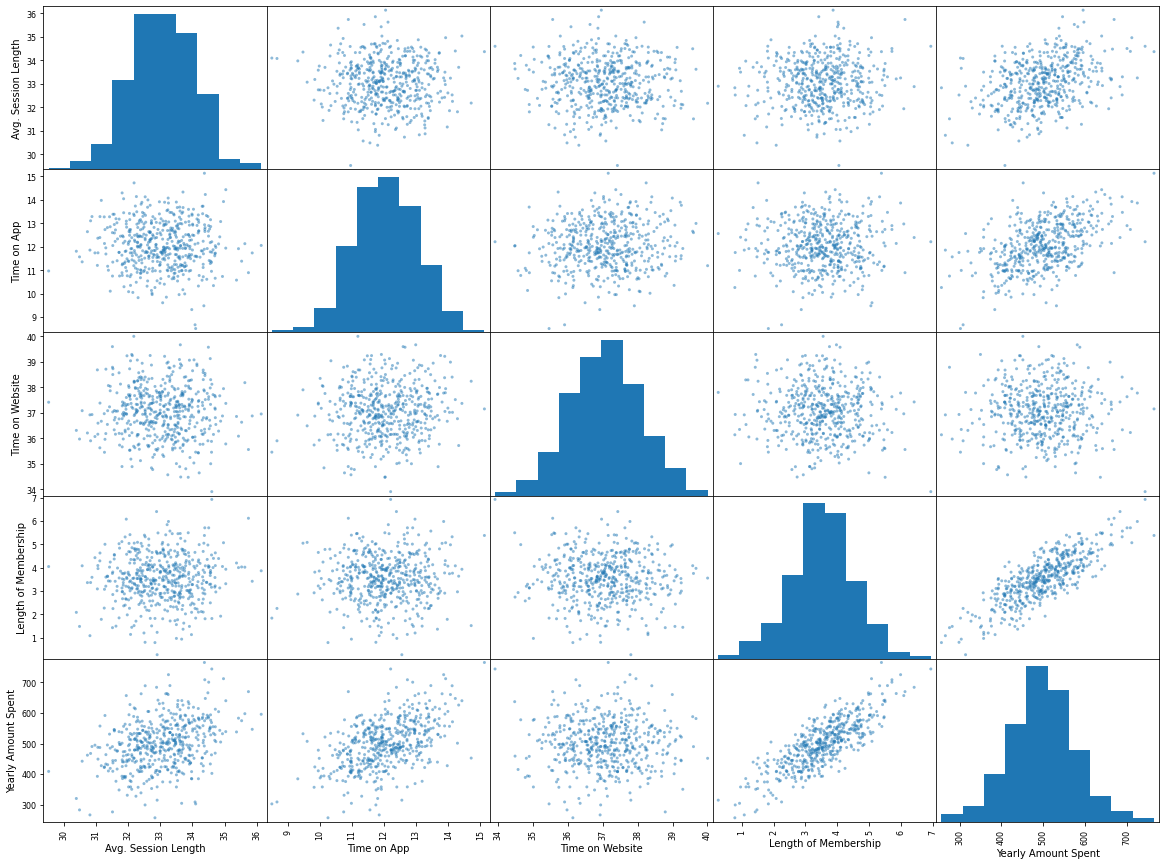

In [9]:
attributes = ['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']
scatter_matrix(data[attributes],figsize=(20,15))

## TRAIN-TEST DATA

In [19]:
x = data.drop(['Yearly Amount Spent'],axis=1)
y = data['Yearly Amount Spent']
print('The shape of x:', format(x.shape))
print('The shape of y:', format(y.shape))

The shape of x: (500, 4)
The shape of y: (500,)


In [21]:
x_train,x_test = train_test_split(x,test_size=0.2,random_state=0)
y_train,y_test = train_test_split(y,test_size=0.2,random_state=0)
print('The shape of x_train:', format(x_train.shape))
print('The shape of y_train:', format(y_train.shape))
print('The shape of x_test:', format(x_test.shape))
print('The shape of y_test:', format(y_test.shape))

The shape of x_train: (400, 4)
The shape of y_train: (400,)
The shape of x_test: (100, 4)
The shape of y_test: (100,)


## MODEL BUILDING

In [22]:
model =  LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

## MODEL TESTING ACCURACY

In [27]:
r2score= r2_score(y_test,pred)
r2score

0.9861924261981548

In [32]:
mse=mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
rmse= np.sqrt(mse)

print('MEAN SQUARED ERROR IS:', mse)
print('MEAN ABSOLUTE ERROR', mae)
print('ROOT MSE:',rmse)

MEAN SQUARED ERROR IS: 92.89010304498497
MEAN ABSOLUTE ERROR 7.645674798915281
ROOT MSE: 9.637951185028122


## PLOTTING

Text(0.5, 1.0, 'The graph of Actual Vs Predicted Values')

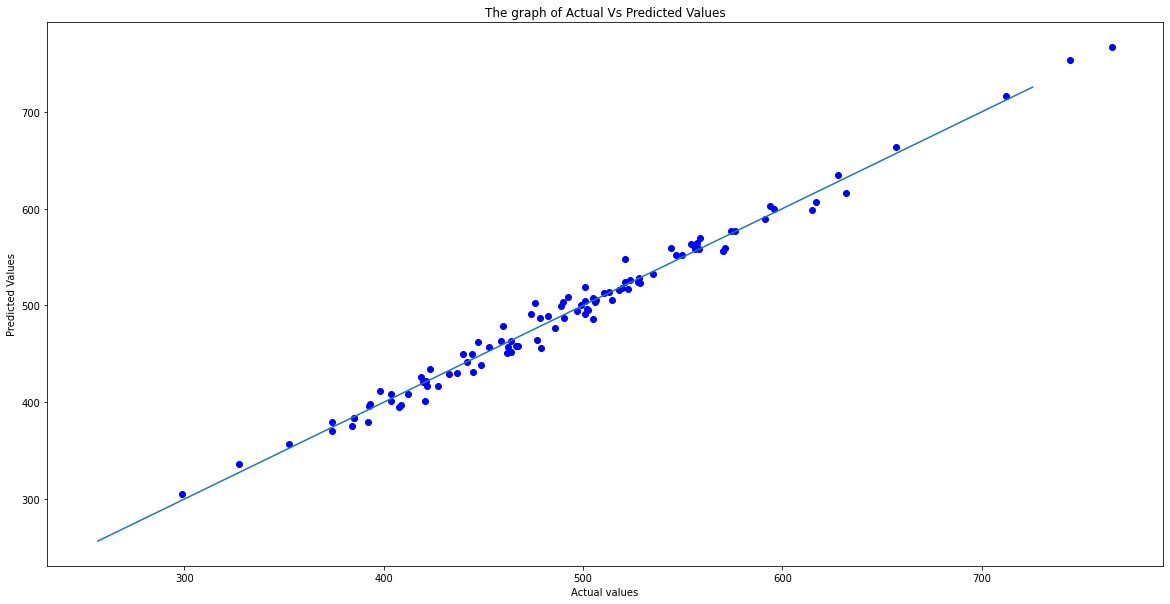

In [39]:
plt.figure(figsize = (20,10))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], label = 'Actual values')
plt.scatter(y_test,pred, color = 'blue', label = 'predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('The graph of Actual Vs Predicted Values')